<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
import warnings
warnings.simplefilter(action='ignore')#, category=FutureWarning)

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(45)
tf.__version__

'1.14.0'

In [2]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=45)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


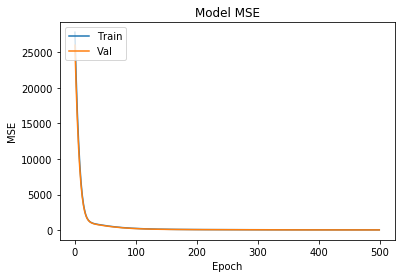

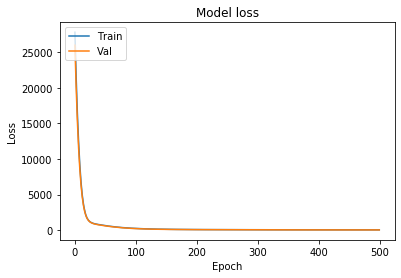

In [4]:
inputs = Input(shape=(13,))

predictions = Dense(1, activation='linear')(inputs)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss="mean_squared_error",
              metrics=['mse'])
history = model.fit(X_train, y_train, validation_split=0.20, epochs=500, verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.evaluate(X_test, y_test, verbose=0)[1]

54.635166

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(60000, -1).astype('float32')
X_test = X_test.reshape(10000, -1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 784) y_train shape: (60000, 10)


In [8]:
inputs = Input(shape=(X_train.shape[1],))

x = Dense(512, activation='relu')(inputs)
x = BatchNormalization(axis=-1)(x)

x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization(axis=-1)(x)
x = Dropout(0.25)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=512, validation_split=0.25, epochs=6, verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/6
45000/45000 [==============================] - 2s 33us/sample - loss: 0.5992 - acc: 0.7960 - val_loss: 0.7745 - val_acc: 0.8045
Epoch 2/6
45000/45000 [==============================] - 1s 23us/sample - loss: 0.4181 - acc: 0.8483 - val_loss: 0.4799 - val_acc: 0.8385
Epoch 3/6
45000/45000 [==============================] - 1s 23us/sample - loss: 0.3713 - acc: 0.8635 - val_loss: 0.4185 - val_acc: 0.8452
Epoch 4/6
45000/45000 [==============================] - 1s 25us/sample - loss: 0.3440 - acc: 0.8743 - val_loss: 0.3981 - val_acc: 0.8499
Epoch 5/6
45000/45000 [==============================] - 1s 23us/sample - loss: 0.3217 - acc: 0.8815 - val_loss: 0.3742 - val_acc: 0.8678
Epoch 6/6
45000/45000 [==============================] - 1s 23us/sample - loss: 0.3061 - acc: 0.8866 - val_loss: 0.3937 - val_acc: 0.8611


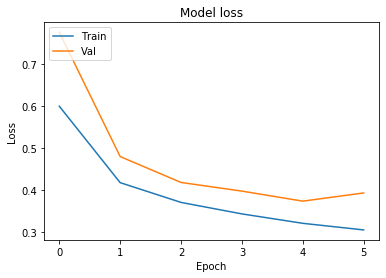

In [9]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0   

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8496


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.

In [12]:
## Fashion MNIST CNN

In [13]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# X shape was (600, 28, 28) NHW C, reshaping it to (600, 28, 28, 1) NHWC
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train = X_train / 255
X_test = X_test / 255

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28, 1) y_train shape: (60000, 10)


In [14]:
inputs = Input(shape=X_train.shape[1:])

# a layer instance is callable on a tensor, and returns a tensor
x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
cnn = Model(inputs=inputs, outputs=predictions)
cnn.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = cnn.fit(X_train, y_train, batch_size=512, validation_split=0.25, epochs=12, verbose=1)

Train on 45000 samples, validate on 15000 samples
Epoch 1/12
45000/45000 [==============================] - 9s 199us/sample - loss: 0.9889 - acc: 0.7423 - val_loss: 3.6395 - val_acc: 0.1459
Epoch 2/12
45000/45000 [==============================] - 6s 141us/sample - loss: 0.4210 - acc: 0.8484 - val_loss: 3.5670 - val_acc: 0.1834
Epoch 3/12
45000/45000 [==============================] - 6s 141us/sample - loss: 0.3491 - acc: 0.8739 - val_loss: 3.3282 - val_acc: 0.2487
Epoch 4/12
45000/45000 [==============================] - 6s 142us/sample - loss: 0.3055 - acc: 0.8906 - val_loss: 2.5316 - val_acc: 0.4735
Epoch 5/12
45000/45000 [==============================] - 6s 143us/sample - loss: 0.2787 - acc: 0.8973 - val_loss: 1.1036 - val_acc: 0.7233
Epoch 6/12
45000/45000 [==============================] - 6s 143us/sample - loss: 0.2585 - acc: 0.9061 - val_loss: 0.4627 - val_acc: 0.8419
Epoch 7/12
45000/45000 [==============================] - 6s 143us/sample - loss: 0.2363 - acc: 0.9126 - val_l

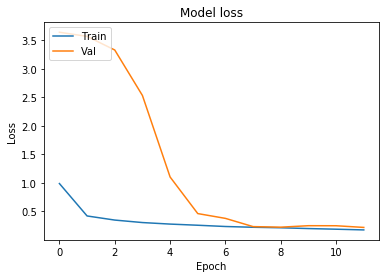

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [16]:
cnn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0   

In [17]:
score = cnn.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9184


## Transfer Learning ResNet50 Fashion-MNIST

In [18]:
# keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


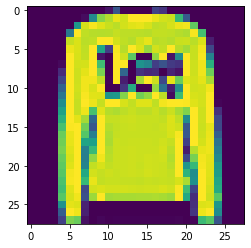

In [20]:
plt.imshow(X_test[1]);

In [21]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# X shape was (600, 28, 28) NHW C, reshaping it to (600, 28, 28, 1) NHWC
# # X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# X_train = X_train / 255
# X_test = X_test / 255

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

In [22]:
dim = (28, 28)

#convert 28x28 grayscale to 28x28 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

rgb_list_train = []
#convert X_train data to 48x48 rgb values
for i in range(len(X_train)):
    rgb = to_rgb(X_train[i])
    rgb_list_train.append(rgb)
    #print(rgb.shape)
    
rgb_list_test = []
for i in range(len(X_test)):
    rgb = to_rgb(X_test[i])
    rgb_list_test.append(rgb)

rgb_arr_train = np.stack([rgb_list_train],axis=4)
rgb_arr_test = np.stack([rgb_list_test],axis=4)
X_train_3D = np.squeeze(rgb_arr_train, axis=4)
X_test_3D = np.squeeze(rgb_arr_test, axis=4)
print("x_train_3D shape:", X_train_3D.shape, "y_train shape:", y_train.shape)

x_train_3D shape: (60000, 28, 28, 3) y_train shape: (60000, 10)


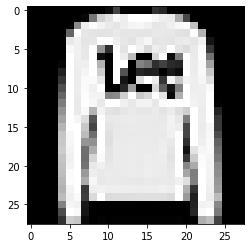

In [23]:
plt.imshow(X_test_3D[1]);

In [24]:
inputs = Input(shape=(28, 28, 3))

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=inputs)

for layer in base_model.layers:
    layer.trainable = False
# for layer in base_model.layers[:200]:
#    layer.trainable = False
# for layer in base_model.layers[200:]:
#    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

resnet = Model(inputs=base_model.inputs, outputs=predictions)

In [25]:
resnet.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 34, 34, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [26]:
resnet.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics=['accuracy'])

history = resnet.fit(X_train_3D, y_train, batch_size=512, validation_split=0.20, epochs=15, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 14s 299us/sample - loss: 1.1319 - acc: 0.6368 - val_loss: 1.9001 - val_acc: 0.4116
Epoch 2/15
48000/48000 [==============================] - 9s 194us/sample - loss: 0.7029 - acc: 0.7574 - val_loss: 2.4886 - val_acc: 0.3533
Epoch 3/15
48000/48000 [==============================] - 9s 192us/sample - loss: 0.6032 - acc: 0.7853 - val_loss: 2.3442 - val_acc: 0.3764
Epoch 4/15
48000/48000 [==============================] - 9s 194us/sample - loss: 0.5408 - acc: 0.8078 - val_loss: 2.4021 - val_acc: 0.3771
Epoch 5/15
48000/48000 [==============================] - 9s 197us/sample - loss: 0.4851 - acc: 0.8245 - val_loss: 2.0877 - val_acc: 0.4112
Epoch 6/15
48000/48000 [==============================] - 9s 195us/sample - loss: 0.4474 - acc: 0.8364 - val_loss: 2.8027 - val_acc: 0.3901
Epoch 7/15
48000/48000 [==============================] - 9s 197us/sample - loss: 0.4120 - acc: 0.8493 - val_

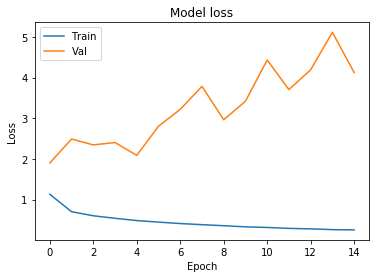

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [28]:
score = resnet.evaluate(X_test_3D, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4228
